<p>En un ejercicio anterior vimos c&oacute;mo podemos aproximar el &aacute;rea de una regi&oacute;n limitada del plano eligiendo puntos aleatoriamente y mirando la proporci&oacute;n entre el n&uacute;mero de puntos dentro de la regi&oacute;n y el total, multiplicando por el &aacute;rea total (la de la regi&oacute;n sobre la que se efect&uacute;an los lanzamientos). Estamos impl&iacute;citamente aceptando que la probabilidad de caer aleatoriamente en una regi&oacute;n es proporcional a su &aacute;rea.</p>
<p>En los siguientes ejercicios aprovechamos este hecho para aproximar &aacute;reas, delimit&aacute;ndolas en una regi&oacute;n rectangular adecuada,&nbsp; $[a,b]\times[c,d]$, y generando coordenadas $xx\in[a,b]$, $yy\in[c,d]$, ambas con el generador random().</p>

<p><strong>Ejemplo .- (Monte Carlo)</strong> Aproximar el &aacute;rea entre las funciones $\small f(x)=x^2+x$ y $\small g(x)=x^3+x^2-2x-2$ en el intervalo $[-2,3]$, generando puntos aleatorios en el rect&aacute;ngulo adecuado.</p>

In [1]:
f(x)=x^2+x
g(x)=x^3+x^2-2*x-2
plot(f,x,-2,3,figsize=3)+plot(g,x,-2,3,color='green',figsize=3)

In [2]:
ym1,xm1=find_local_minimum(g,-2,3)
ym1,xm1

(-2.631130309440899, 0.54858377024960503)

In [3]:
a,b,c,d=-2.,3.,ym1,g(3)

In [4]:
%time
M=10^5
dentro=[]
for _ in xrange(M):
    xx,yy=a+(b-a)*random(),c+(d-c)*random()
    if (f(xx)-yy)*(g(xx)-yy)<0:
        dentro.append((xx,yy))
print len(dentro)/M*(b-a)*(d-c),integral_numerical(abs(f(x)-g(x)),a,b)
points(dentro,pointsize=5,figsize=3)

14.9403338084298 (14.750001940963852, 7.008363256807634e-06)
CPU time: 38.07 s,  Wall time: 38.07 s

<p><strong>Ejercicio .- (Monte Carlo)</strong> Aproximar el &aacute;rea entre las funciones $\small f(x)=\mathrm{sen}(2x)$ y $\small g(x)=\frac12\mathrm{cos}(x)$ en el intervalo $[-2,3]$, generando puntos aleatorios en el rect&aacute;ngulo adecuado.</p>

In [5]:
f(x)=sin(2*x)
g(x)=1/2*cos(x)
show(plot(f,x,-2,3,figsize=5)+plot(g,x,-2,3,color='green',figsize=5))
a,b=-2,3

In [6]:
(ym,xm)=find_local_minimum(f,-2,3);print ym
(yM,xM)=find_local_maximum(f,-2,3);print yM

-1.0
1.0

In [7]:
%time
M=10^5
dentro2=[]
for j in xrange(M):
    z,t=random()*(b-a)+a,random()*(yM-ym)+ym
    if (f(z)-t)*(g(z)-t)<0:
        dentro2+=[(z,t)]
print (len(dentro2)/M)*(b-a)*(yM-ym),integral_numerical(abs(f(x)-g(x)),a,b)

2.9098 (2.9178843557213785, 2.618886220578742e-06)
CPU time: 38.29 s,  Wall time: 38.30 s

In [8]:
points(dentro,pointsize=5,figsize=4)

<p>En ocasiones, querremos calcular probabilidades en regiones (intervalos, regiones planas, ....) y estas no ser&aacute;n proporcionales al tama&ntilde;o relativo del suceso. Por ejemplo, puede que estemos lanzando dardos sobre el intervalo $[1,5]$ y el tirador tenga el doble de facilidad de acertar en $[1,3)$ que en $[3,5]$. Si $A$ es el suceso acertar en $[1,3)$, ocurre que $P(A)=2/3$ y $P(A^c)=1/3$; pero $A=[1,3)$ y $A^c=[3,5]$ tienen ambos la misma longitud. Estas situaciones se modelan por medio de la llamada <em>funci&oacute;n de densidad</em>. As&iacute;, si un fen&oacute;meno aleatorio tiene asociada una funci&oacute;n de densidad $f$, que tiene que ser no negativa y tener integral total $1$, la probabilidad de un subconjunto $A$ vendr&aacute; dada por</p>
<p>$$P(A)=\int_A f(x)\,dx.$$</p>
<p>&nbsp;</p>
<p>Un caso particular es la funci&oacute;n constante $f(x)=\frac{1}{b-a}$ si $a&lt;x&lt;b$ que corresponde a la distribuci&oacute;n uniforme en $[a,b]$, pues</p>
<p>$$P([c,d])=\int_c^d\frac1{b-a}\,dx=\frac{d-c}{b-a}\qquad \text{ si }a\le c&lt;d\le b\,.$$</p>
<p>&nbsp;</p>
<p>Obs&eacute;rvese que, si tenemos una funci&oacute;n de densidad $f$ sobre un intervalo $[a,b]$, y tomamos la primitiva $F(x)=\int_a^x f(t)\,dt$, entonces</p>
<p>$$P([c,d])=F(d)-F(c)\qquad \text{ si }a\le c&lt;d\le b\,.$$</p>
<p>La funci&oacute;n $F(x)=\int_a^x f(t)\,dt$ es, as&iacute;, una herramienta ideal para el c&aacute;lculo de probabilidades y se conoce como la funci&oacute;n de distribuci&oacute;n.</p>
<p><strong>Nota:</strong> Obs&eacute;rvese que la funci&oacute;n de distribuci&oacute;n $F(x)$ siempre toma valores entre $0$ y $1$.</p>
<p>&nbsp;</p>

<p>&iquest;C&oacute;mo generar con Sage aleatoriamente observaciones que sigan una distribuci&oacute;n que no sea la $U(0,1)$? Veamos qu&eacute; hicimos para generar una distribuci&oacute;n uniforme en $(a,b)$, porque ah&iacute; est&aacute; la idea.</p>
<p>Recordemos que si $yy$ es una observaci&oacute;n de una $U(0,1)$, $xx=a+(b-a)yy$ lo es de una $U(a,b)$.</p>
<p>Obśervese que $H(t)=a+(b-a)t$ es la inversa de la funci&oacute;n de distribuci&oacute;n de $U(a,b)$,&nbsp; $F(x)=\frac{x-a}{b-a}$. Para generar observaciones de la uniforme en $(a,b)$ basta as&iacute; con hacer <span style="font-family: comic sans ms,sans-serif; font-size: medium;">xx=H(random())</span>.</p>
<p><em><br /></em></p>
<p><strong>Ejercicio.-</strong> Generar $100$ valores de una $U(2,4)$,&nbsp; utilizando el siguiente esquema: $yy=\mathrm{random}()$, $xx=H(yy)$, siendo $H$ la inversa de la funci&oacute;n de distribuci&oacute;n.</p>
<p>En cada generaci&oacute;n unir por una l&iacute;nea los puntos $(0,yy)$, $(xx,F(xx))$ y $(xx,0)$. A&ntilde;adir la gr&aacute;fica de la funci&oacute;n de distribuci&oacute;n $F(x)$.</p>

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


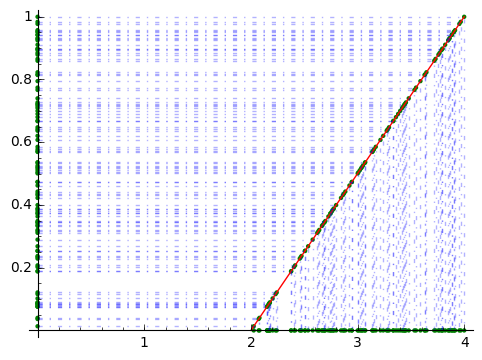

In [1]:
%time
a,b=2,4
F_uniforme(x)=(x-a)/(b-a)
Grafica=plot(F_uniforme,x,a,b,figsize=5,color='red')
for _ in range(100):
    yy=random()
    xx=(b-a)*yy+a
    puntos=[(0,yy),(xx,F_uniforme(xx)),(xx,0)]
    Grafica+=points(puntos,color='green')+line(puntos,linestyle='-.',alpha=.3)
Grafica.show(figsize=5)

<p>Esta idea se generaliza de forma inmediata a otras distribuciones.</p>
<h3>Distribuci&oacute;n exponencial: $\mathrm{exp}(\lambda)$</h3>
<ul>
<li>Densidad: $\scriptsize f(x)=\lambda e^{-\lambda x},\quad x&gt;0.\quad$ Distribuci&oacute;n: $\scriptsize F(x)=1-e^{-\lambda x},\quad x&gt;0$.</li>
<li>Generaci&oacute;n aleatoria: utilizar la inversa de la funci&oacute;n de distribuci&oacute;n $\scriptsize H(x)=\frac{-1}{\lambda}\log(1-x)$, aplicada a observaciones $x$ de una $U(0,1)$.</li>
</ul>
<p><strong>Ejercicio.-</strong> Generar $100$ valores de una $\mathrm{exp}(.3)$,&nbsp; utilizando el siguiente esquema: $yy=\mathrm{random}()$, $xx=H(yy)$, siendo $H$ la inversa de la funci&oacute;n de distribuci&oacute;n.</p>
<p>En cada generaci&oacute;n unir por una l&iacute;nea los puntos $(0,yy)$, $(xx,F(xx))$ y $(xx,0)$. A&ntilde;adir la gr&aacute;fica de la funci&oacute;n de distribuci&oacute;n $F(x)$.</p>
<p><strong>Optativo.-</strong> Con los resultados obtenidos comparar la <em>media observada</em> con la <em>te&oacute;rica</em> de esta distribuci&oacute;n: $\scriptsize \frac1\lambda$.</p>

In [10]:
l=.3
F(x)=1-e^(-l*x)
H(x)=-1/l*log(1-x)
M=100
grafica=plot(F,x,0,20,figsize=5,color='red')
for j in xrange(M):
    yy=random()
    xx=H(yy)
    puntos=[(0,yy),(xx,F(xx)),(xx,0)]
    grafica+=points(puntos,color='green')+line(puntos,linestyle=':',alpha=.3)
grafica.show(figsize=5)

<p><strong>Ejercicio.-</strong> En un servicio de atenci&oacute;n telef&oacute;nica transcurre una media de 10 minutos entre dos llamadas consecutivas. Se sabe que $X=$<em>"tiempo entre dos llamadas de dicho servicio"</em> sigue una distribuci&oacute;n $\mathrm{exp}(\lambda)$, con $\lambda=0.1$. Realizar experimentos aleatorios para calcular las siguientes probabilidades:</p>
<ol style="list-style-type: lower-alpha;">
<li>$\small P(\text{al menos 5 llamadas en 1 hora})$</li>
<li>$\small P(\text{5 llamadas en 1 hora})$</li>
<li>$\small P(\text{a lo sumo 5 llamadas en 1 hora})$</li>
</ol>

In [11]:
l=.1
H(x)=-1/l*log(1-x)
M=10000
exitos=0
for j in xrange(M):
    tiempo=0
    for i in xrange(5):
        yy=random()
        xx=H(yy)
        tiempo+=xx
    exitos+=bool(tiempo<=60)
print exitos/M.n()

0.722700000000000

<h3>Poblaciones normales: $N(\mu,\sigma)$</h3>
<p>Un fen&oacute;meno aleatorio $X$ con distribuci&oacute;n normal de media $\mu$ y desviaci&oacute;n t&iacute;pica $\sigma$, $X\sim N(\mu,\sigma)$, tiene funci&oacute;n de densidad</p>
<p>$$\small f(x)=\frac1{\sigma\sqrt{2\pi}}e^{\frac{-1}2(\frac{x-\mu}\sigma)^2}\,,\quad x\in\mathbb R$$</p>
<p>Su funci&oacute;n de distribuci&oacute;n $\small F(x)=\int_{-\infty}^x f(t)\,dt$ no es sencilla de invertir, por lo que el m&eacute;todo seguido hasta ahora no nos sirve. Utilizaremos, en su lugar, la funci&oacute;n de Sage <span style="font-family: courier new,courier;"><strong>normalvariate(mu,s)</strong></span> que genera un valor aleatorio de la distribuci&oacute;n $N(mu,s)$.</p>
<p><strong></strong><strong>Ejercicio.-</strong> La altura, en cms., de un espa&ntilde;ol elegido al azar sigue una distribuci&oacute;n $N(170,20)$. Calcular, experimentalmente, la probabilidad de encontrar en un grupo de $10$ espa&ntilde;oles, $3$ con altura superior a $185$cm&nbsp; y $2$ por debajo de $150$cm.</p>

In [12]:
normalvariate(170,20)

206.09473695817175

In [13]:
f(x)=1/(sqrt(2*pi)*20)*e^(-1/2*((x-170)/20)^2)
plot(f,0,300,figsize=5)

In [14]:
F=dict()
for j in srange(70,100,1/10):
    q=floor(100*integral_numerical(f(x),80,j)[0])/100
    F[q]=j
for j in srange(100,270,1/10):
    q=floor(100*integral_numerical(f(x),80,j)[0])/100
    F[q]=j

In [15]:
def NnN():
    return F[floor(100*random())/100].n()

In [16]:
NnN()

132.300000000000

In [17]:
M=10000
exitos=0
for j in xrange(M):
    alto185=0
    bajo150=0
    for _ in xrange(10):
#       n=normalvariate(170,20)
        n=NnN()
        if n>185:
            alto185+=1
        if n<150:
            bajo150+=1
    if alto185>=3 and bajo150>=2:
        exitos+=1
print exitos/M.n()

0.143800000000000

In [18]:
%time
mu,s=170,20
ngrupo=10
M=10000
exito=0
for j in xrange(M):
    grupo=[normalvariate(mu,s) for _ in xrange(ngrupo)] #Este es el experimento que repetimos M veces
    altos,bajos=0,0
    for dato in grupo:
        if dato>185:
            altos+=1
        elif dato<150:
            bajos+=1
    exito+=bool((altos>=3) and (bajos>=2))
(exito/M).n()

0.159300000000000
CPU time: 1.53 s,  Wall time: 1.53 s

In [19]:
l=F.keys()
l.sort()
l=l[1:len(l)-2]
L=[(a,F[a]) for a in l]
line(L,figsize=4)